# WeatherPy
----

### Analysis
* Cities closer the equator have higher temperatures, as expected. As we move away from the equator, cities in the northern hemisphere see a greater decrease in temperature compared to the southern hemisphere.
* Latitude does not seem to affect humidity levels. Perhaps with another study we can examine if cities closer to a body of water have higher humidity. There doesn't seem to be a strong relationship between latitude and cloudiness either.
* Latitude does not affect wind speed either. A better study would be to examine the relationship between the city's altitude and windspeed.
* A city's temperaure is heavily influenced by it's latitude. Humidity, cloudines, and wind speed are all driven by other factors.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Sample of Json response from API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

params = {"appid": api_key,
         "units": units,
         "q": "irvine"}

response = requests.get(url, params=params).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 33.69, 'lon': -117.83},
 'dt': 1541693460,
 'id': 5359777,
 'main': {'humidity': 87,
          'pressure': 1016,
          'temp': 62.17,
          'temp_max': 66.02,
          'temp_min': 57.2},
 'name': 'Irvine',
 'sys': {'country': 'US',
         'id': 375,
         'message': 0.0057,
         'sunrise': 1541686645,
         'sunset': 1541724744,
         'type': 1},
 'visibility': 4828,
 'weather': [{'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 20, 'speed': 3.36}}


In [4]:
#Create Dataframe
weather_df = pd.DataFrame({"City": cities})
weather_df["Country"] = ""
weather_df["Temperature (F)"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sidi ali,,,,,,,
1,butaritari,,,,,,,
2,leningradskiy,,,,,,,
3,atuona,,,,,,,
4,sisimiut,,,,,,,


In [5]:
# Perform API Calls for each City
params = {"appid": api_key,
         "units": units,
         "q": ""}

weather = []

print("Beginning Data Retrieval")
print("----------------------------------")

for index, row in weather_df.iterrows():
    params["q"] = row.City
    print("Processing Record " + str(index + 1) + " of " + str(len(cities)) + " | " + row.City)
    response = requests.get(url, params=params).json()
    weather.append(response)
    
    try:
        weather_df.loc[index, "Country"] = response['sys']['country']
        weather_df.loc[index, "Temperature (F)"] = response['main']['temp']
        weather_df.loc[index, "Latitude"] = response['coord']['lat']
        weather_df.loc[index, "Longitude"] = response['coord']['lon']
        weather_df.loc[index, "Humidity (%)"] = response['main']['humidity']
        weather_df.loc[index, "Cloudiness (%)"] = response['clouds']['all']
        weather_df.loc[index, "Wind Speed (mph)"] = response['wind']['speed']
    except:
        print("City Not Found...Skipping...")
        
    
          
print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")


Beginning Data Retrieval
----------------------------------
Processing Record 1 of 626 | sidi ali
Processing Record 2 of 626 | butaritari
Processing Record 3 of 626 | leningradskiy
Processing Record 4 of 626 | atuona
Processing Record 5 of 626 | sisimiut
Processing Record 6 of 626 | rikitea
Processing Record 7 of 626 | yellowknife
Processing Record 8 of 626 | kostomuksha
Processing Record 9 of 626 | taolanaro
City Not Found...Skipping...
Processing Record 10 of 626 | piopio
Processing Record 11 of 626 | upernavik
Processing Record 12 of 626 | wajid
Processing Record 13 of 626 | kidal
Processing Record 14 of 626 | ushuaia
Processing Record 15 of 626 | kenai
Processing Record 16 of 626 | zhangjiakou
Processing Record 17 of 626 | east london
Processing Record 18 of 626 | hermanus
Processing Record 19 of 626 | dutlwe
Processing Record 20 of 626 | bethel
Processing Record 21 of 626 | carnarvon
Processing Record 22 of 626 | mys shmidta
City Not Found...Skipping...
Processing Record 23 of 626

Processing Record 192 of 626 | yanan
City Not Found...Skipping...
Processing Record 193 of 626 | provideniya
Processing Record 194 of 626 | thompson
Processing Record 195 of 626 | pisco
Processing Record 196 of 626 | faanui
Processing Record 197 of 626 | havoysund
Processing Record 198 of 626 | maceio
Processing Record 199 of 626 | etchojoa
Processing Record 200 of 626 | jiexiu
Processing Record 201 of 626 | peterhead
Processing Record 202 of 626 | okhotsk
Processing Record 203 of 626 | sur
Processing Record 204 of 626 | tsiroanomandidy
Processing Record 205 of 626 | shache
Processing Record 206 of 626 | belushya guba
City Not Found...Skipping...
Processing Record 207 of 626 | sao felix do xingu
Processing Record 208 of 626 | tingo maria
Processing Record 209 of 626 | strezhevoy
Processing Record 210 of 626 | hervey bay
Processing Record 211 of 626 | monaghan
Processing Record 212 of 626 | la primavera
Processing Record 213 of 626 | lolua
City Not Found...Skipping...
Processing Record 

City Not Found...Skipping...
Processing Record 378 of 626 | cololaca
Processing Record 379 of 626 | san cristobal
Processing Record 380 of 626 | bambanglipuro
Processing Record 381 of 626 | vytegra
Processing Record 382 of 626 | chara
Processing Record 383 of 626 | dekoa
City Not Found...Skipping...
Processing Record 384 of 626 | coquimbo
Processing Record 385 of 626 | warrington
Processing Record 386 of 626 | rio grande
Processing Record 387 of 626 | makaha
Processing Record 388 of 626 | lotoshino
Processing Record 389 of 626 | soyo
Processing Record 390 of 626 | moose factory
Processing Record 391 of 626 | yulara
Processing Record 392 of 626 | hede
Processing Record 393 of 626 | chalchihuites
Processing Record 394 of 626 | kahului
Processing Record 395 of 626 | xapuri
Processing Record 396 of 626 | grand river south east
City Not Found...Skipping...
Processing Record 397 of 626 | mutis
Processing Record 398 of 626 | terrasini
Processing Record 399 of 626 | makuyuni
Processing Record 

Processing Record 568 of 626 | la ronge
Processing Record 569 of 626 | opuwo
Processing Record 570 of 626 | tual
Processing Record 571 of 626 | bedesa
Processing Record 572 of 626 | boralday
Processing Record 573 of 626 | wanaka
Processing Record 574 of 626 | shipunovo
Processing Record 575 of 626 | awbari
Processing Record 576 of 626 | englewood
Processing Record 577 of 626 | bronnoysund
Processing Record 578 of 626 | aykhal
Processing Record 579 of 626 | culebra
Processing Record 580 of 626 | rongcheng
Processing Record 581 of 626 | halalo
City Not Found...Skipping...
Processing Record 582 of 626 | boa vista
Processing Record 583 of 626 | alexandria
Processing Record 584 of 626 | kamenka
Processing Record 585 of 626 | lacolle
Processing Record 586 of 626 | yar-sale
Processing Record 587 of 626 | khorramshahr
Processing Record 588 of 626 | chimore
Processing Record 589 of 626 | broome
Processing Record 590 of 626 | turukhansk
Processing Record 591 of 626 | evensk
Processing Record 592

In [7]:
#Display Data frame after API calls are made
weather_df.head(10)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sidi ali,DZ,70.58,36.1,0.42,69,0,3.6
1,butaritari,KI,85.61,3.07,172.79,99,64,18.25
2,leningradskiy,RU,13.79,69.38,178.42,100,48,7.63
3,atuona,PF,76.74,-9.8,-139.03,100,100,7.74
4,sisimiut,GL,-5.16,66.94,-53.67,100,0,1.81
5,rikitea,PF,71.79,-23.12,-134.97,100,0,7.96
6,yellowknife,CA,12.2,62.45,-114.38,85,90,16.11
7,kostomuksha,RU,34.67,64.59,30.6,98,92,3.6
8,taolanaro,,,,,,,
9,piopio,CL,53.6,-42.79,-73.57,93,90,4.7


In [8]:
# Check data types
weather_df.dtypes

City                object
Country             object
Temperature (F)     object
Latitude            object
Longitude           object
Humidity (%)        object
Cloudiness (%)      object
Wind Speed (mph)    object
dtype: object

In [9]:
# convert objects to float
weather_df[["Temperature (F)", "Latitude", "Longitude", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]] = weather_df[["Temperature (F)", "Latitude", "Longitude", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]].apply(pd.to_numeric)
weather_df.dtypes

City                 object
Country              object
Temperature (F)     float64
Latitude            float64
Longitude           float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [10]:
#count to make sure all rows have data
weather_df.count()

City                626
Country             626
Temperature (F)     562
Latitude            562
Longitude           562
Humidity (%)        562
Cloudiness (%)      562
Wind Speed (mph)    562
dtype: int64

In [11]:
#remove cities that were skipped in API call
weather_df = weather_df.dropna(how="any")
weather_df.count()

City                562
Country             562
Temperature (F)     562
Latitude            562
Longitude           562
Humidity (%)        562
Cloudiness (%)      562
Wind Speed (mph)    562
dtype: int64

In [12]:
#output 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\Karl\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


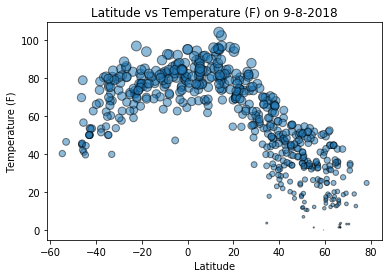

In [21]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], s=weather_df["Temperature (F)"], alpha=0.5, marker="o", edgecolors="black")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs Temperature (F) on 9-8-2018")
plt.savefig("Graphs/Lat_vs_temp.png", dpi=200)
plt.show()

#### Latitude vs. Humidity Plot

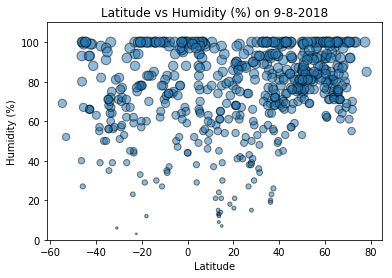

In [22]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], s=weather_df["Humidity (%)"], marker="o", alpha=0.5, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 110)
plt.title("Latitude vs Humidity (%) on 9-8-2018")
plt.savefig("Graphs/Lat_vs_Humidity.png", dpi=200)
plt.show()

#### Latitude vs. Cloudiness Plot

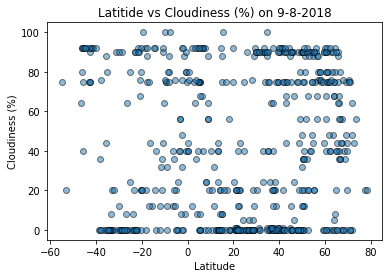

In [23]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=0.5, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitide vs Cloudiness (%) on 9-8-2018")
plt.savefig("Graphs/Lat_vs_Cloudiness.png", dpi=200)
plt.show()

#### Latitude vs. Wind Speed Plot

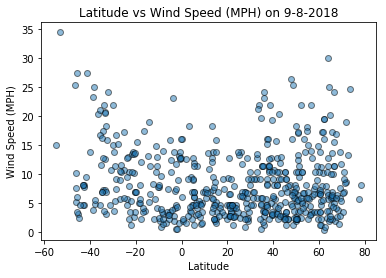

In [24]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], alpha=0.5, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs Wind Speed (MPH) on 9-8-2018")
plt.savefig("Graphs/Lat_vs_WindSpeed.png", dpi=200)
plt.show()